In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'user_features.csv', 'train.csv', 'sample_submission_only_headers.csv']


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn import metrics

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
hike1 = pd.read_csv('../input/train.csv')
hike2 = pd.read_csv('../input/user_features.csv')
hike1_1=hike1[hike1.is_chat == 1].head(20000)
hike1_0=hike1[hike1.is_chat ==0].head(20000)
hike1= pd.concat([hike1_1,hike1_0], axis=0)
hike1.shape

(40000, 3)

In [4]:
hike2.columns = ['node1_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']
hike = hike1.merge(hike2, on='node1_id')
hike.columns = ['node1_id', 'node2_id', 'is_chat', 'f1_1', 'f2_1', 'f3_1', 'f4_1', 'f5_1', 'f6_1',
       'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1', 'f13_1']
hike2.columns = ['node2_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']
hikedf = hike.merge(hike2, on='node2_id')

In [5]:
hikedf.head(20)

,node1_id,node2_id,is_chat,f1_1,f2_1,f3_1,f4_1,f5_1,f6_1,f7_1,f8_1,f9_1,f10_1,f11_1,f12_1,f13_1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,7159649,7791327,1,0,0,0,2,2,0,8,7,2,15,13,6,10,31,22,9,31,25,12,31,27,18,31,29,24,11
1,4771042,998845,1,31,0,0,31,2,0,31,4,0,31,4,0,8,31,9,0,31,10,0,31,10,0,31,10,2,8
2,3079025,3410678,1,0,0,0,0,0,0,1,1,0,8,3,1,11,0,0,0,0,0,0,5,1,0,12,5,1,15
3,3651503,3656309,1,30,15,0,30,19,2,31,25,8,31,30,15,11,31,12,5,31,16,6,31,22,10,24,18,10,11
4,3651503,8038123,1,30,15,0,30,19,2,31,25,8,31,30,15,11,1,1,0,1,1,0,0,0,0,0,0,0,15
5,6434643,1107217,1,29,16,2,29,19,4,27,14,5,26,10,5,15,31,28,21,31,24,19,31,21,17,31,16,13,15
6,4481921,504660,1,12,12,2,16,16,8,21,21,13,21,21,13,15,2,1,1,9,8,8,14,13,13,15,14,13,11
7,8531387,8136174,1,15,11,4,8,5,2,2,2,2,0,0,0,15,31,13,3,31,14,4,31,14,4,31,12,1,7
8,639430,4249041,1,31,31,31,31,31,31,31,31,31,31,31,31,7,31,9,6,31,11,8,31,12,9,31,15,11,15
9,2894527,5343816,1,31,5,0,31,6,0,31,8,0,31,10,0,15,7,7,7,14,14,13,20,20,18,27,27,25,7


In [6]:
hikedf.tail(20)

,node1_id,node2_id,is_chat,f1_1,f2_1,f3_1,f4_1,f5_1,f6_1,f7_1,f8_1,f9_1,f10_1,f11_1,f12_1,f13_1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
39980,3971899,7514184,0,31,14,0,31,13,0,31,15,0,31,18,0,15,31,20,0,31,19,0,31,19,0,31,16,0,15
39981,3980676,2557875,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,2,1,0,3,2,0,3,2,0,4
39982,8175051,6248498,0,31,29,15,31,31,19,30,30,18,27,27,18,7,23,16,6,30,23,12,31,28,17,31,28,19,15
39983,6216526,467772,0,0,0,0,0,0,0,0,0,0,0,0,0,15,31,5,0,31,3,0,31,3,0,31,4,1,7
39984,8115718,5540908,0,31,10,0,31,11,0,31,13,0,31,11,0,15,31,9,1,31,6,1,31,6,1,31,9,1,15
39985,2797064,6604257,0,31,31,31,31,31,31,31,31,31,31,31,31,7,31,14,7,31,14,8,31,12,7,31,8,4,10
39986,6100698,2013361,0,6,3,1,6,3,1,2,2,1,0,0,0,15,31,11,8,31,14,9,28,17,12,28,21,15,15
39987,1058153,4669508,0,24,13,6,24,14,8,24,15,6,27,18,5,8,31,25,10,31,24,10,30,26,12,29,24,12,11
39988,1894715,5470633,0,13,2,0,9,1,0,8,1,0,4,0,0,15,27,27,26,27,27,26,27,27,25,27,25,23,10
39989,7613,188887,0,31,6,0,28,8,1,25,8,1,25,9,1,15,31,22,11,31,24,16,31,26,19,31,26,19,15


In [7]:
hikedf.f13.value_counts()

15    18584
7     10045
8      5630
10     2142
11     2031
4       673
6       190
5       181
9       180
1       170
13       69
14       47
2        46
3        11
12        1
Name: f13, dtype: int64

In [8]:
int(56.32)

56

In [9]:
hikedf['f1'] = round((hikedf['f1']+2*hikedf['f1_1'])/3)
hikedf['f2'] = round((hikedf['f2']+2*hikedf['f2_1'])/3)
hikedf['f3'] = round((hikedf['f3']+2*hikedf['f3_1'])/3)
hikedf['f4'] = round((hikedf['f4']+2*hikedf['f4_1'])/3)
hikedf['f5'] = round((hikedf['f5']+2*hikedf['f5_1'])/3)
hikedf['f6'] = round((hikedf['f6']+2*hikedf['f6_1'])/3)
hikedf['f7'] = round((hikedf['f7']+2*hikedf['f7_1'])/3)
hikedf['f8'] = round((hikedf['f8']+2*hikedf['f8_1'])/3)
hikedf['f9'] = round((hikedf['f9']+2*hikedf['f9_1'])/3)
hikedf['f10'] = round((hikedf['f10']+2*hikedf['f10_1'])/3)
hikedf['f11'] = round((hikedf['f11']+2*hikedf['f11_1'])/3)
hikedf['f12'] = round((hikedf['f12']+2*hikedf['f12_1'])/3)
hikedf['f13'] = hikedf['f13_1']

hikedf.drop(['f1_1', 'f2_1', 'f3_1', 'f4_1',
       'f5_1', 'f6_1', 'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1',
       'f13_1'], axis=1, inplace=True)

x= hikedf.drop(['node1_id', 'node2_id', 'is_chat'], axis=1)
y= hikedf.is_chat

In [10]:
x.f13=x.f13.astype('object')

In [11]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 13 columns):
f1     40000 non-null float64
f2     40000 non-null float64
f3     40000 non-null float64
f4     40000 non-null float64
f5     40000 non-null float64
f6     40000 non-null float64
f7     40000 non-null float64
f8     40000 non-null float64
f9     40000 non-null float64
f10    40000 non-null float64
f11    40000 non-null float64
f12    40000 non-null float64
f13    40000 non-null object
dtypes: float64(12), object(1)
memory usage: 4.3+ MB


In [12]:
x=pd.get_dummies(x)
x.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13_0,f13_1,f13_2,f13_3,f13_4,f13_5,f13_6,f13_7,f13_8,f13_9,f13_10,f13_11,f13_12,f13_13,f13_14,f13_15
0,10.0,7.0,3.0,12.0,10.0,4.0,16.0,14.0,7.0,20.0,18.0,12.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,31.0,3.0,0.0,31.0,5.0,0.0,31.0,6.0,0.0,31.0,6.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,9.0,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,30.0,14.0,2.0,30.0,18.0,3.0,31.0,24.0,9.0,29.0,26.0,13.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,20.0,10.0,0.0,20.0,13.0,1.0,21.0,17.0,5.0,21.0,20.0,10.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [13]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_split, x_test, y_split, y_test = train_test_split(x,y,test_size=0.2, random_state=100) 
x_train, x_val, y_train, y_val = train_test_split(x_split,y_split,test_size=0.2, random_state=100)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_val_std = sc.transform(x_val)

### 1. Logistic Regression

### 3. Decision Tree

### 4. Naive Bayes Model

### 5. Multinomial Naive Bayes

### 6. Random Forest

### 7. Bagging Classifier

### 8. Adaptive Boosting

### 9. Gradient Boosting

### 10. XG Boost

In [14]:
xgcl = xgb.XGBClassifier()
param = {'n_estimators': sp_randint(1, 80)}
randomCV = RandomizedSearchCV(xgcl, param_distributions=param, n_iter=80)
randomCV.fit(x_val,y_val)
randomCV.best_params_

{'n_estimators': 79}

In [15]:
xgcl = xgb.XGBClassifier(n_estimators=77)
xgcl.fit(x_train, y_train)
print('The accuracy score for XG Boost model is %1.2f per cent' %((xgcl.score(x_test,y_test)*100)))

The accuracy score for XG Boost model is 71.26 per cent


0.7892140753350256


(-0.05, 1.05)

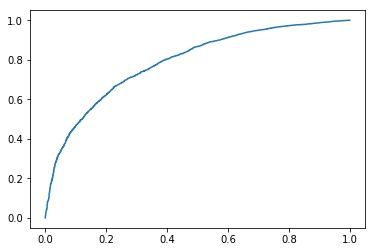

In [16]:
y_pred = xgcl.predict_proba(x_test)

fpr,tpr,thr = metrics.roc_curve(y_test,y_pred[:,1])
roc_auc = metrics.auc(fpr,tpr)

print(roc_auc)

plt.figure()
plt.plot(fpr,tpr)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

## K-Fold Analysis

In [17]:
test = pd.read_csv('../input/test.csv')

hike2.columns = ['node1_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']
test1 = test.merge(hike2, on='node1_id')

test1.columns = ['id','node1_id', 'node2_id', 'f1_1', 'f2_1', 'f3_1', 'f4_1', 'f5_1', 'f6_1',
       'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1', 'f13_1']

hike2.columns = ['node2_id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       'f11', 'f12', 'f13']

testdf = test1.merge(hike2, on='node2_id')

In [18]:
testdf['f1'] = round((testdf['f1']+2*testdf['f1_1'])/3)
testdf['f2'] = round((testdf['f2']+2*testdf['f2_1'])/3)
testdf['f3'] = round((testdf['f3']+2*testdf['f3_1'])/3)
testdf['f4'] = round((testdf['f4']+2*testdf['f4_1'])/3)
testdf['f5'] = round((testdf['f5']+2*testdf['f5_1'])/3)
testdf['f6'] = round((testdf['f6']+2*testdf['f6_1'])/3)
testdf['f7'] = round((testdf['f7']+2*testdf['f7_1'])/3)
testdf['f8'] = round((testdf['f8']+2*testdf['f8_1'])/3)
testdf['f9'] = round((testdf['f9']+2*testdf['f9_1'])/3)
testdf['f10'] = round((testdf['f10']+2*testdf['f10_1'])/3)
testdf['f11'] = round((testdf['f11']+2*testdf['f11_1'])/3)
testdf['f12'] = round((testdf['f12']+2*testdf['f12_1'])/3)
testdf['f13'] = testdf['f13_1']

testdf.drop(['f1_1', 'f2_1', 'f3_1', 'f4_1',
       'f5_1', 'f6_1', 'f7_1', 'f8_1', 'f9_1', 'f10_1', 'f11_1', 'f12_1',
       'f13_1'], axis=1, inplace=True)

idn = testdf.id
test = testdf.drop(['id','node1_id','node2_id'], axis=1)

In [19]:
test.f13=test.f13.astype('object')

In [20]:
test= pd.get_dummies(test)

In [21]:
xgcl.fit(x,y)
pred = xgcl.predict_proba(test)
output = pd.DataFrame({'id': idn, 'is_chat': pred[:,1]})
output.sort_values('id',inplace=True)
output.to_csv('XG_Boost_Balanced_new.csv', index=False)